#### 

'''
생필품 도시별 카테고리별 품목별 판매가격 DF

연도 2019 - 2023
'''

In [1]:
import pymysql
import pandas as pd
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

conn = pymysql.connect(host = '172.20.97.217', user='member1', password='1234', db='product', charset='utf8')

# DF의 칼럼들을 같이 리턴
cur = conn.cursor(pymysql.cursors.DictCursor)

query = """ 
select city.city_name as '도시', sss.category_name as '소분류', sss.product_name as '제품명', 
sss.product_price as '가격', sss.year as 'year'
from city_tb as city 
	inner join 
	(select ppp.type_id , ppp.product_type , price.city_id , ppp.category_name , 
	ppp.product_name  , price.product_price , price.year 
	from product_price_tb price
	inner join
		(select ttt.type_id, ttt.product_type, ttt.category_name, name.product_name , name.product_id
		from product_name_tb as name
		inner join 
			(select ptype.type_id, ptype.product_type, categ.category_name, categ.category_id 
				from product_type_tb as ptype
				inner join product_category_tb as categ
			on ptype.type_id = categ.type_id
			where ptype.type_id = 'C') as ttt
		on name.category_id = ttt.category_id) as ppp
	on price.product_id = ppp.product_id) as sss
on city.city_id = sss.city_id		
order by sss.year asc ;
"""

# 쿼리 실행
cur.execute(query)

# 모든 데이터 가져오기
data = cur.fetchall()

In [2]:
fresh_dict = {}
freshDF = pd.DataFrame(data)

category = [
 '구강청결제',
 '면도날',
 '주방세제',
 '랩',
 '칫솔',
 '세탁세제(액체형)',
 '바디워시',
 '로션',
 '위생백',
 '고무장갑',
 '섬유탈취제',
 '염색약',
 '섬유유연제',
 '세탁세제(가루형)',
 '부탄가스',
 '습기제거제',
 '손세정제',
 '치약',
 '생리대',
 '종이기저귀',
 '샴푸',
 '살충제',
 '비누']


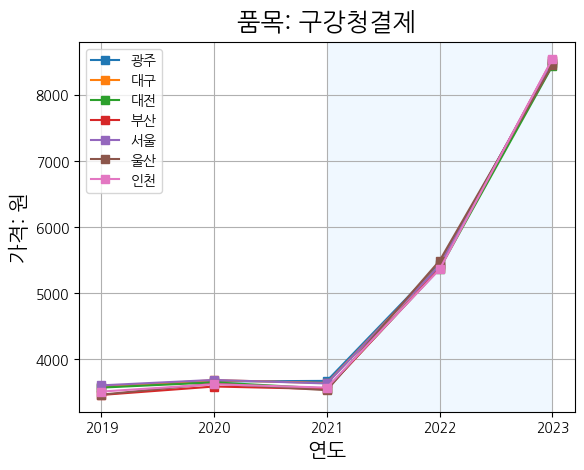

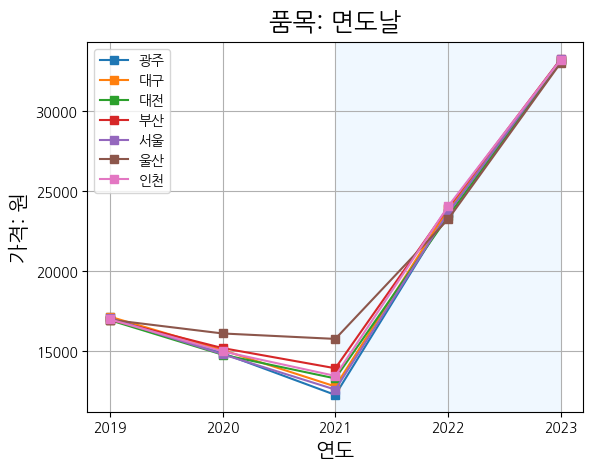

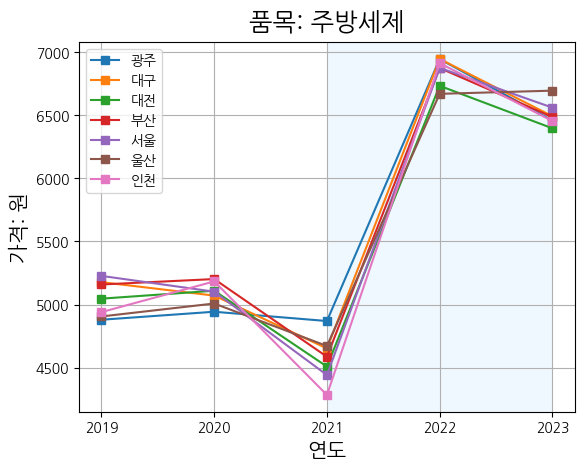

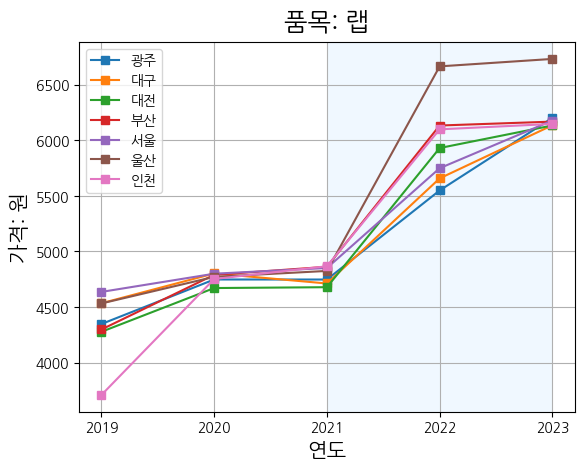

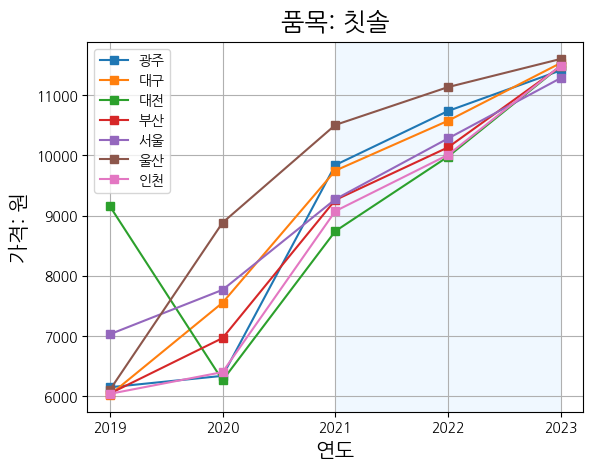

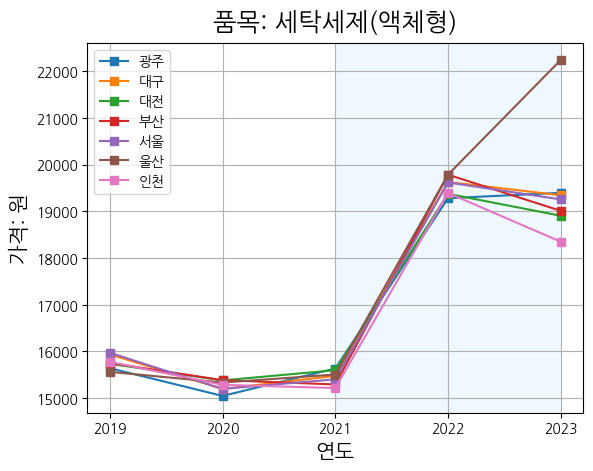

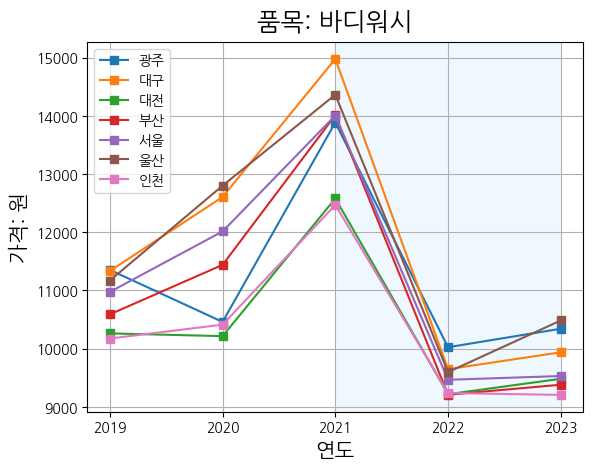

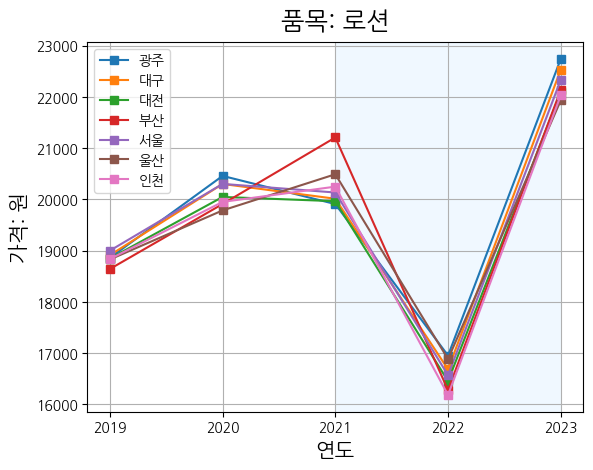

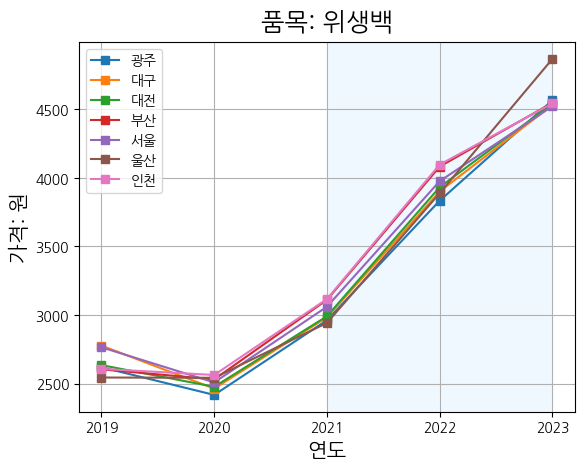

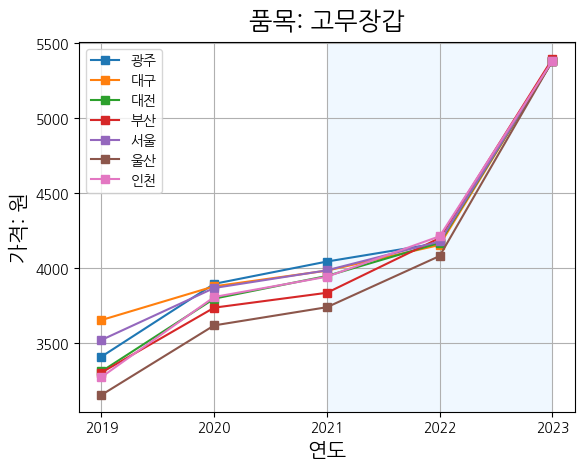

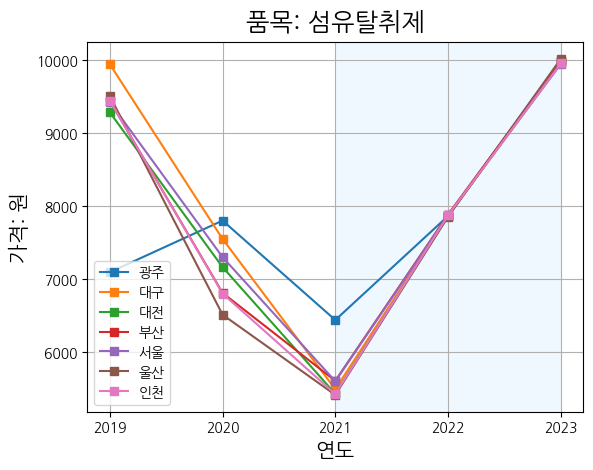

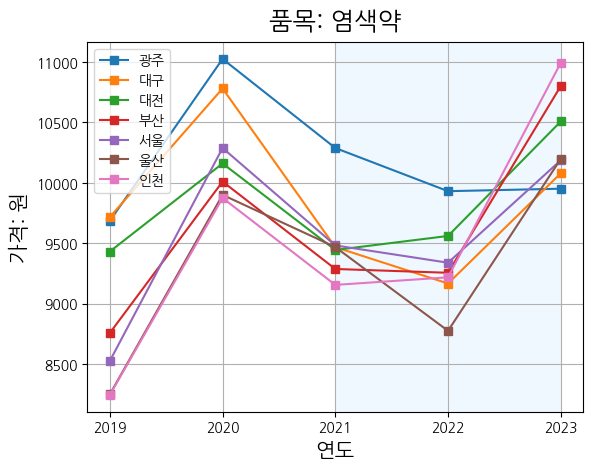

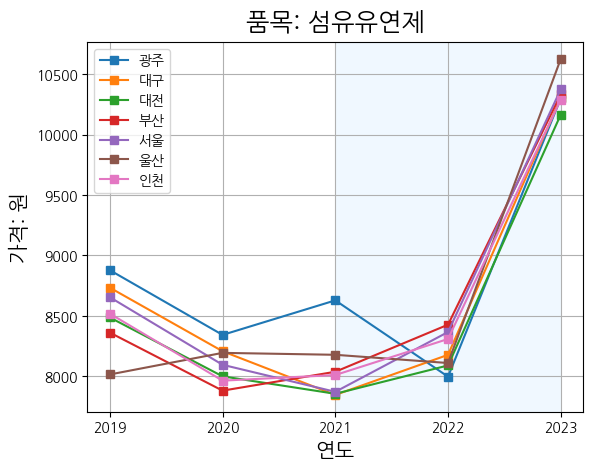

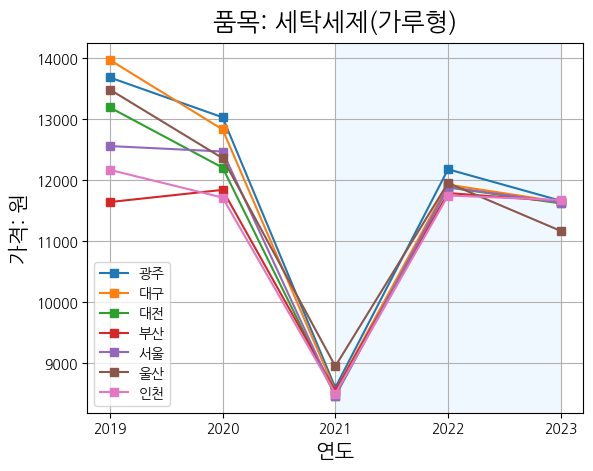

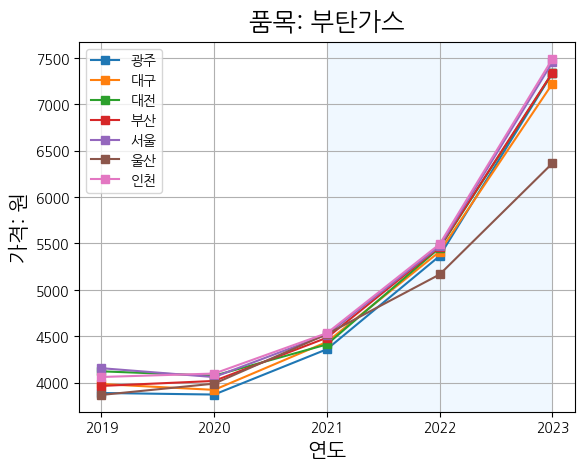

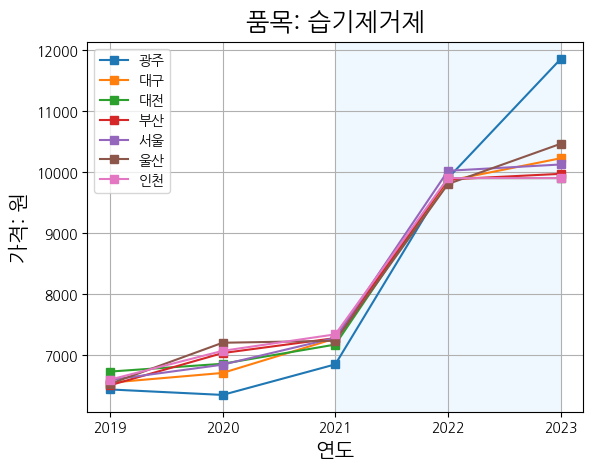

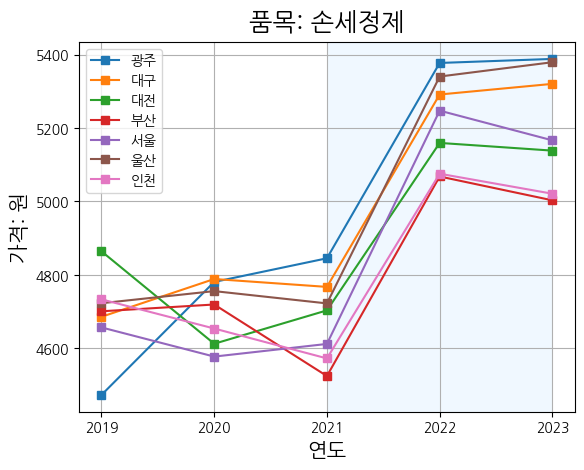

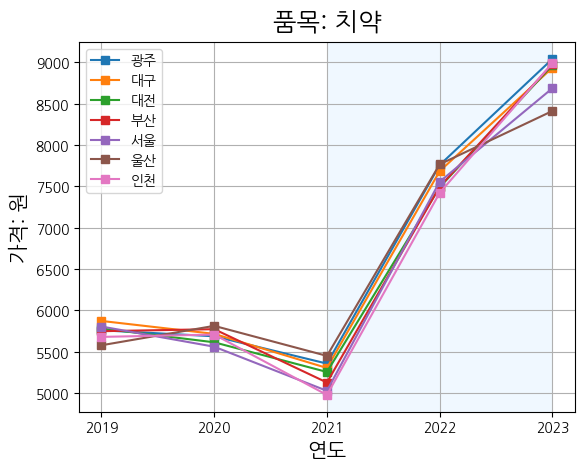

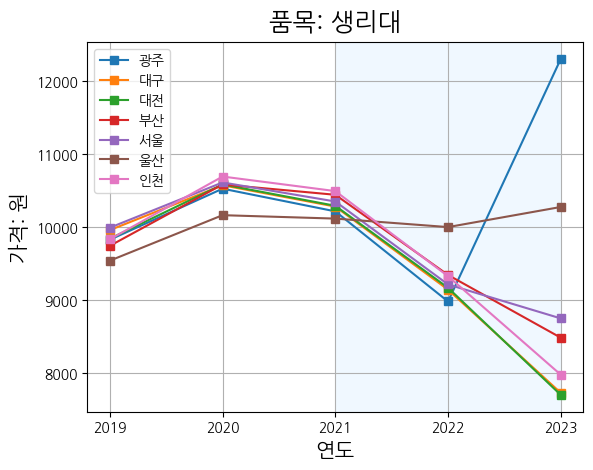

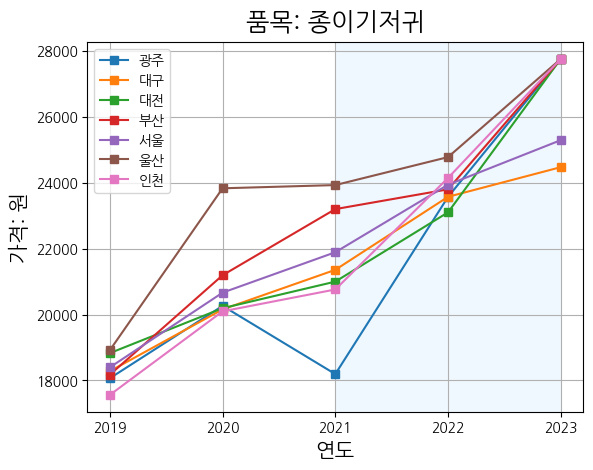

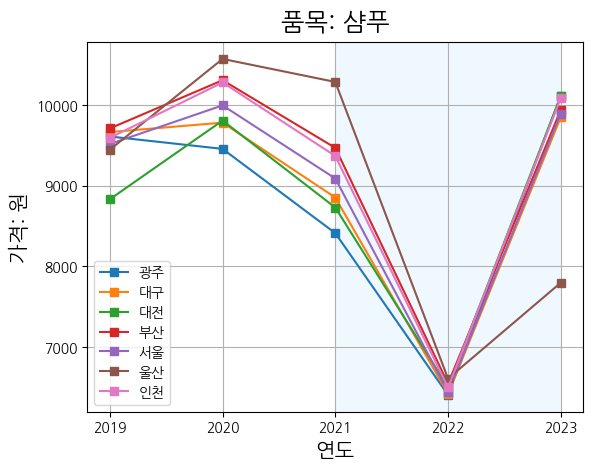

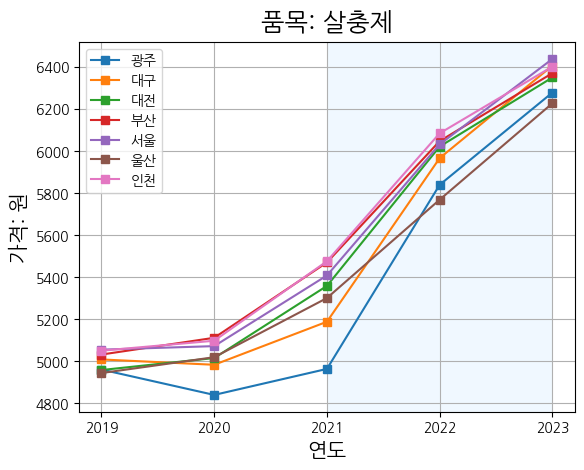

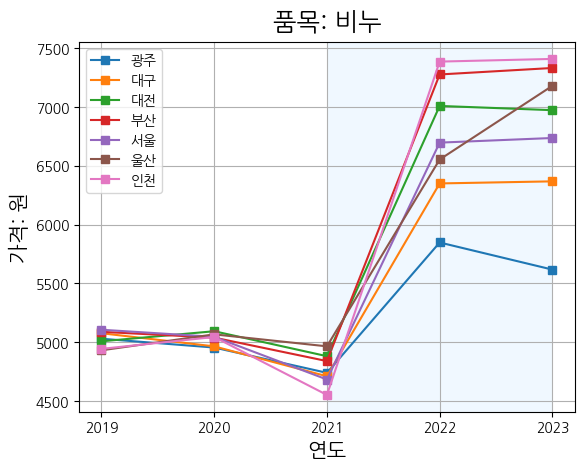

In [166]:

datasDF = freshDF.groupby(['도시','year','소분류']).mean(numeric_only=True)
place_name = datasDF.index.levels[0].to_list()

for idx in range(len(category)):
	for name in place_name:
		fresh_dict[name] = datasDF.xs(category[idx],level=2).loc[name]['가격'].to_list()
	for key, val in fresh_dict.items():
		# plt.figure(figsize=(8,5))
		plt.title(f'품목: {category[idx]}', fontsize=18, pad=10)
		plt.plot(range(2019,2024), val, label=key, marker='s',
		   markersize=6)
		plt.xticks(range(2019,2024), labels=[2019,2020,2021,2022,2023], fontsize=10)
		# plt.yticks(val,fmt=f'{val:,}')
		plt.ylabel('가격: 원', fontsize=15)
		plt.xlabel('연도', fontsize=15)
		plt.axvspan(2021,2023, facecolor='aliceblue', alpha=0.4)
	plt.grid(True)
	plt.legend()
	plt.show()

In [ ]:

datasDF = freshDF.groupby(['도시','year','소분류']).mean(numeric_only=True)
place_name = datasDF.index.levels[0].to_list()

for idx in range(len(category)):
	for name in place_name:
		fresh_dict[name] = datasDF.xs(category[idx],level=2).loc[name]['가격'].to_list()
	for key, val in fresh_dict.items():
		# plt.figure(figsize=(8,5))
		if key == '광주':
			plt.title(f'품목: {category[idx]}', fontsize=18, pad=10)
			plt.plot(range(2019,2024), val, label=key, marker='s',
			markersize=6, linestyle='r-')
			plt.xticks(range(2019,2024), labels=[2019,2020,2021,2022,2023], fontsize=10)
			# plt.yticks(val,fmt=f'{val:,}')
			plt.ylabel('가격: 원', fontsize=15)
			plt.xlabel('연도', fontsize=15)
			plt.axvspan(2021,2023, facecolor='aliceblue', alpha=0.4)
	plt.grid(True)
	plt.legend()
	plt.show()

#### 울산,광주만 강조 plot

In [14]:
fresh_dict = {}
freshDF = pd.DataFrame(data)

category2 = [
 '칫솔',
 '세탁세제(액체형)',
 '바디워시',
 '섬유탈취제',
 '섬유유연제',
 '부탄가스',
 '습기제거제',
 '손세정제',
 '종이기저귀',
 '샴푸',
 '비누']

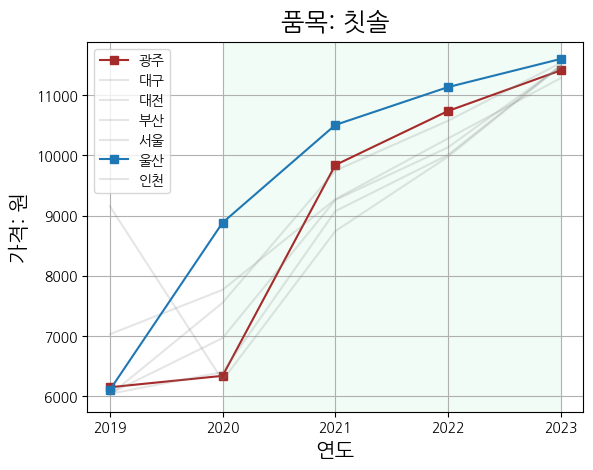

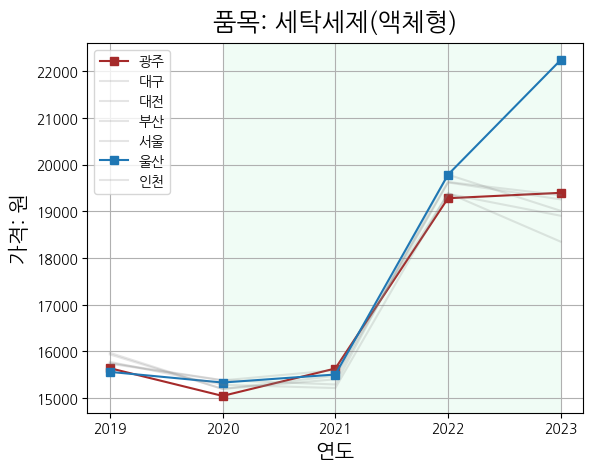

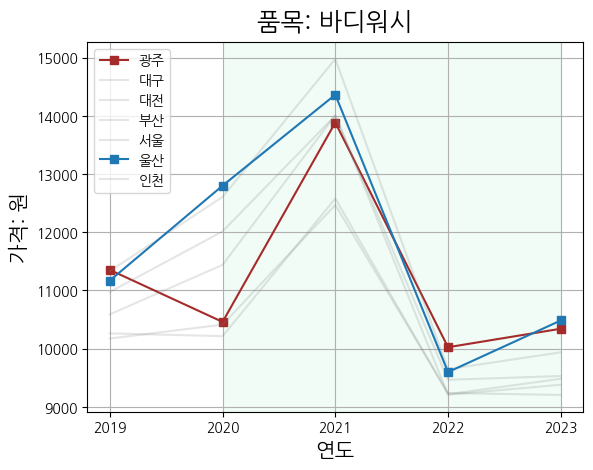

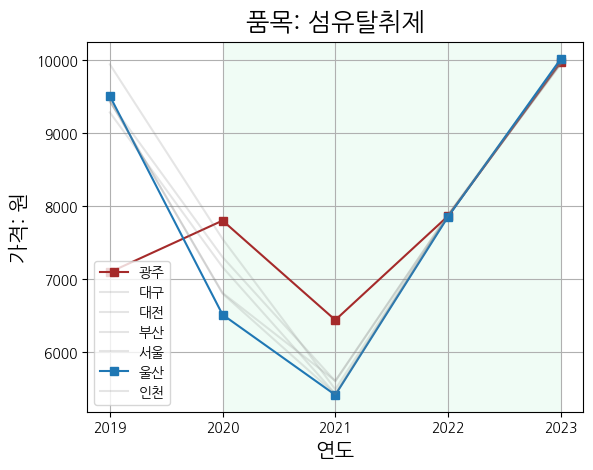

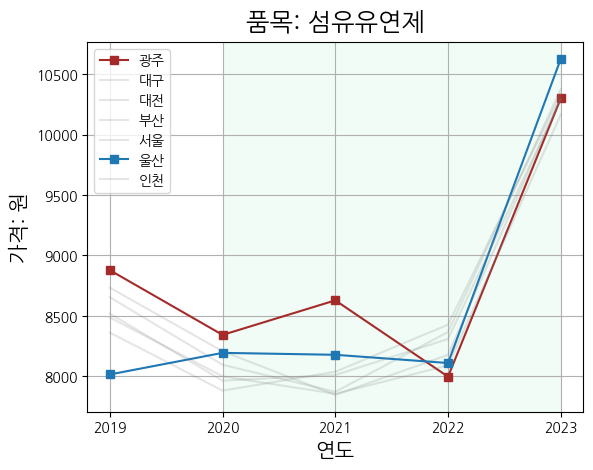

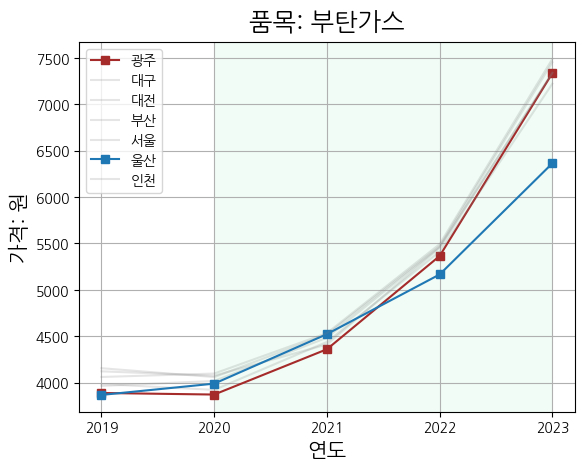

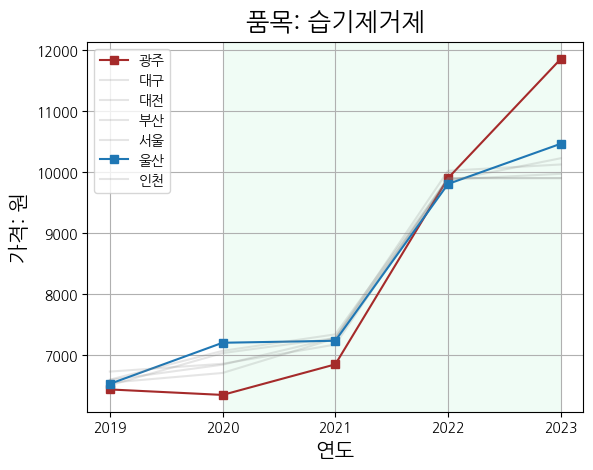

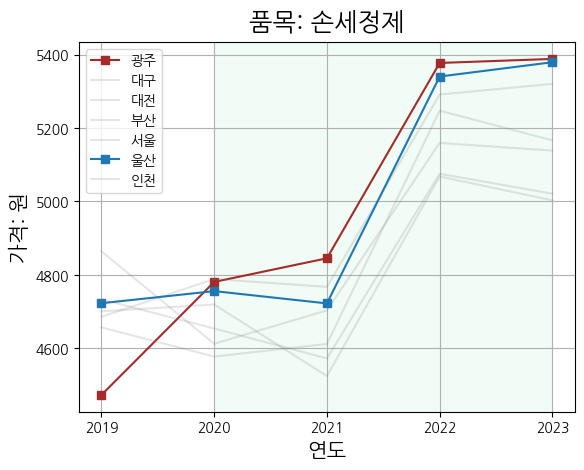

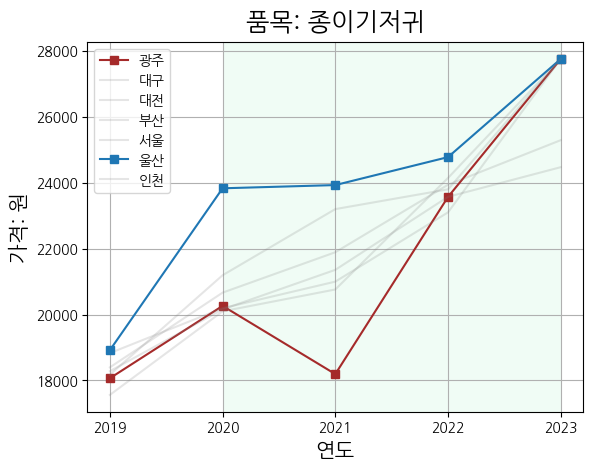

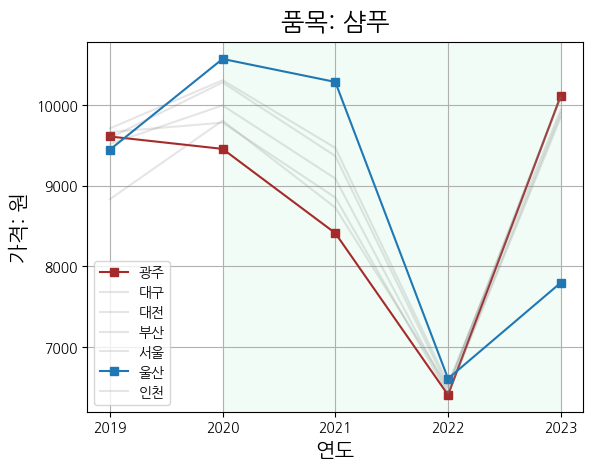

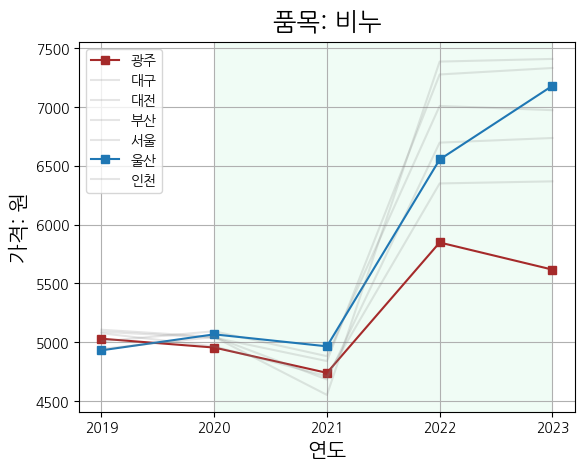

In [17]:
for idx in range(len(category2)):
	for name in place_name:
		fresh_dict[name] = datasDF.xs(category2[idx],level=2).loc[name]['가격'].to_list()
	
	for key, val in fresh_dict.items():
		# plt.figure(figsize=(8,5))
		if key == '광주':
			plt.title(f'품목: {category2[idx]}', fontsize=18, pad=10)
			plt.plot(range(2019,2024), val, '-', color='brown', label=key, marker='s',
				markersize=6 )
			plt.xticks(range(2019,2024), labels=[2019,2020,2021,2022,2023], 
					fontsize=10)
			plt.ylabel('가격: 원', fontsize=15)
			plt.xlabel('연도', fontsize=15)
			plt.axvspan(2020,2023, facecolor='honeydew', alpha=0.4)

		elif key == '울산':
			plt.title(f'품목: {category2[idx]}', fontsize=18, pad=10)
			plt.plot(range(2019,2024), val, '-', color='tab:blue', label=key, marker='s',
				markersize=6 )
			plt.xticks(range(2019,2024), labels=[2019,2020,2021,2022,2023], 
					fontsize=10)
			plt.ylabel('가격: 원', fontsize=15)
			plt.xlabel('연도', fontsize=15)
			plt.axvspan(2020,2023, facecolor='honeydew', alpha=0.4)

		else:
			plt.title(f'품목: {category2[idx]}', fontsize=18, pad=10)
			plt.plot(range(2019,2024), val, '-', color='gray', label=key, alpha=0.2)
			plt.xticks(range(2019,2024), labels=[2019,2020,2021,2022,2023], 
					fontsize=10)
			plt.ylabel('가격: 원', fontsize=15)
			plt.xlabel('연도', fontsize=15)
			plt.axvspan(2020,2023, facecolor='honeydew', alpha=0.4)
		
	plt.axvspan(2020,2023, facecolor='aliceblue', alpha=0.4)
	plt.grid(True)
	plt.legend()
	plt.show()

### check_img

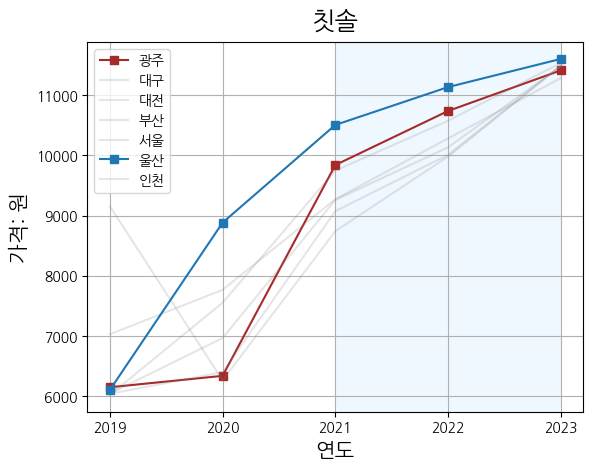

In [13]:
fresh_dict = {}
freshDF = pd.DataFrame(data)
datasDF = freshDF.groupby(['도시','year','소분류']).mean(numeric_only=True)
place_name = datasDF.index.levels[0].to_list()
for name in place_name:
    fresh_dict[name] = datasDF.xs('칫솔',level=2).loc[name]['가격'].to_list()
    
# plt.figure(figsize=(10,6)
for key, val in fresh_dict.items():
	if key == '광주':
		plt.title('칫솔', fontsize=18, pad=10)
		plt.plot(range(2019,2024), val, '-', color='brown', label=key, marker='s',
		    markersize=6, )
		plt.xticks(range(2019,2024), labels=[2019,2020,2021,2022,2023], 
				fontsize=10)
		# plt.yticks(val,fmt=f'{val:,}')
		plt.ylabel('가격: 원', fontsize=15)
		plt.xlabel('연도', fontsize=15)
		plt.axvspan(2021,2023, facecolor='aliceblue', alpha=0.4)

	elif key=='울산':
		plt.title('칫솔', fontsize=18, pad=10)
		plt.plot(range(2019,2024), val, '-', color='tab:blue', label=key, marker='s',
		    markersize=6, )
		plt.xticks(range(2019,2024), labels=[2019,2020,2021,2022,2023], 
				fontsize=10)
		# plt.yticks(val,fmt=f'{val:,}')
		plt.ylabel('가격: 원', fontsize=15)
		plt.xlabel('연도', fontsize=15)
		plt.axvspan(2021,2023, facecolor='aliceblue', alpha=0.4)
	else:
		plt.title('칫솔', fontsize=18, pad=10)
		plt.plot(range(2019,2024), val, '-', color='gray', label=key, alpha=0.2)
		plt.xticks(range(2019,2024), labels=[2019,2020,2021,2022,2023], 
				fontsize=10)
		# plt.yticks(val,fmt=f'{val:,}')
		plt.ylabel('가격: 원', fontsize=15)
		plt.xlabel('연도', fontsize=15)
		plt.axvspan(2021,2023, facecolor='aliceblue', alpha=0.4)

    
plt.grid(True)
plt.legend()
plt.show()